In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Motivating Numerical Differentiation

We recently saw one motivating example for numerical differentiation. In solving non-linear systems with linear interpolation via the multidimensional Newton-Raphson Method, we needed to compute an $n\times n$ matrix of partial derivatives. Replacing the algebraic derivative functions with approximations of the derivative at the point in question, using the difference quotient, saved us the time of computing those derivatives and also the time required to explicitly code them into Python for use with our solver. The ability to use numeric approximations for these partial derivatives made our function much more generally useable, since a user only needs to define the original vector-valued function and an initial guess at the target root in order to use it.

(-10.0, 10.0)

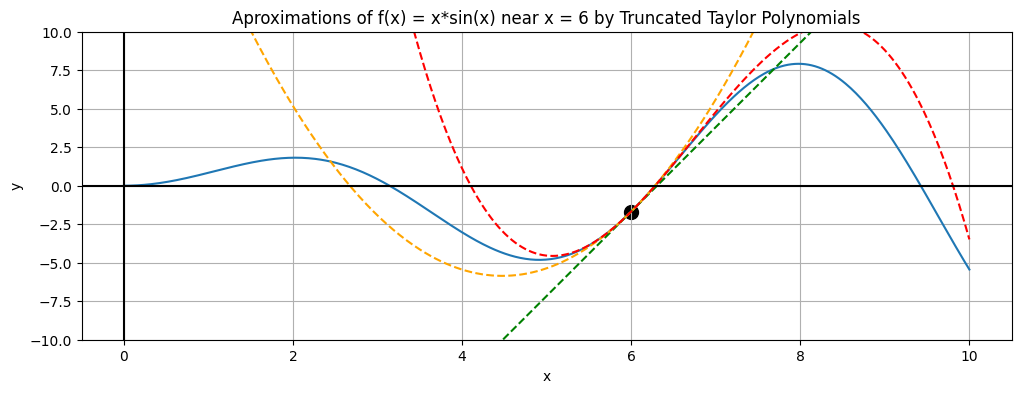

In [9]:
#@title
x_vals = np.linspace(0, 10, 500)
y_vals = x_vals*np.sin(x_vals)

x0 = 6
y0 = x0*np.sin(x0)

m1 = x0*np.cos(x0) + np.sin(x0)
m2 = -x0*np.sin(x0) + 2*np.cos(x0)
m3 = -x0*np.cos(x0) - 3*np.sin(x0) 

d1_vals = m1*(x_vals - x0) + y0
d2_vals = m2*(x_vals - x0)**2/2 + m1*(x_vals - x0) + y0
d3_vals = m3*(x_vals - x0)**3/6 + m2*(x_vals - x0)**2/2 + m1*(x_vals - x0) + y0

plt.figure(figsize = (12, 4))
plt.plot(x_vals, y_vals)
plt.plot(x_vals, d1_vals, color = "green", ls = "--")
plt.plot(x_vals, d2_vals, color = "orange", ls = "--")
plt.plot(x_vals, d3_vals, color = "red", ls = "--")
plt.scatter(x0, y0, color = "black", s = 100)
plt.grid()
plt.axvline(x = 0, color = "black")
plt.axhline(y = 0, color = "black")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Aproximations of f(x) = x*sin(x) near x = 6 by Truncated Taylor Polynomials")
plt.ylim((-10, 10))

Our focus through this topic will be the problem of estimating one of the derivatives of a function $f\left(x\right)$ at $x = x^*$. We might be interested in the first derivative or the $10^{th}$ derivative, but the goal is to do this as efficiently and as accurately as possible. We'll have access to a finite (by the nature of computing) number of discrete data points $\left(x_i, y_i\right)$ satisfying $f\left(x\right)$. 

In the image above, we developed first-, second-, and third-order Taylor Polynomial approximations for $f\left(x\right) = x\cdot\sin\left(x\right)$. We can approximate the derivative of $f'\left(x\right)$ for values *near* $x = 6$ by computing the derivative of a Taylor Polynomial, but we need to recognize that now we are suffering from two types of error: (i) roundoff errors caused by limited machine precision, and (ii) the error in using an interpolant as a substitute for the actual function. For this reason, a functions derivative can never be computed with the same precision as the function itself.